# Part 1: Categorising News Articles using Machine Learning

### Abstract

This is part 1 of a series of projects to help me understand the real-life applications of Machine Learning. I will be trying to answer the question, "How do startup fintech companies provide sentiment based trading signals to investment professionals?".


### Aim

Having worked within investment management for many years, I have become interested in understanding the real-life applications of Machine Learning, specifically Natural Language Processing (NLP), within the finance industry. There is a huge amount of information that a Chartered Financial Analyst needs to navigate through. Traditional methods of analysis needs to be augmented with state-of-the-art data science techniques. 

Some of the really exciting potential applications include:
-  Trading signals derived from Sentiment Analysis
-  Classification and clustering of financial related documents.
-  Auto summarisation of text documents including transcipts of company conference calls. 
-  Processing company earnings reports in the quickest time possible in order to gain an information advantage.

My plan is to conduct a series of small projects, narrow in scope, that will allow me to keep within my abilities. From my initial research, I become inspired by the "institutional quality data feeds" built into the Quantopian.com pipeline. For example: 
-  StockTwits Trade Mood from PsychSignal
-  Twitter Trader Mood from PsychSignal
-  Sentdex Sentiment Analysis

(I have not developed any trading algorithms on Quantopian yet because my focus is on becoming a Data Scientist.)

**How do startup companies provide sentiment based trading signals to investment professionals?**

To tackle this question, I will conduct several loosely related project workstreams: 
-  News classification - filtering general news articles to those related to 'Business'
-  Sentiment Analysis (postive or negative) - movie reviews and Twitter feeds. 
-  Applying Daily News to to predict Stock Market returns. 

These building blocks will be powerful components that I can adapt as a framework for use in future work related to Sentiment Analysis and NLP. 

One burning question you might want me to answer immediately is whether I have found any Alpha? Yes. To a certain extent. At this stage of my analysis there is not enough Alpha on a stand-alone basis for a complete trading model. But I am very confident that with more work, there is enough Alpha there to be extracted and used as a part of an overall strategy, namely the Sentiment-based component. 

I am constantly learning and there is always room for improvements. 

Please note that I am only able to use non-proprietary, publicly available datasets, which will obviously lessen the information advantage. 

## 1. News Classification

### 1.1 Executive Summary

The machine learning model is able to predict with **94.5% accuracy** the category of a news article. 

There is a trade-off between time and accuracy:
-  The fastest solution takes under 5 seconds to run and has an accuracy of 92.5% (Multinomial Naive Bayes). 
-  The highest accuracy solution takes over 5 minutes to complete (Logistic Regression).


### 1.2 About the Dataset

The News Aggregator dataset was first used in the publication:
-  Gasparetti, F. Data Mining and Knowledge Discovery (2017) 31: 502. https://doi.org/10.1007/s10618-016-0482-x

It can be easily downloaded from the UCI Machine Learning Repository:
-  http://archive.ics.uci.edu/ml/datasets/News+Aggregator
-  [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml). Irvine, CA: University of California, School of Information and Computer Science.

This dataset contains headlines, URLs, and categories for **422,419** news stories collected by a web aggregator between March 10th, 2014 and August 10th, 2014. News categories in this dataset are labelled as: Business (b), Entertainment (e), Technology (t), Health (m)

There are other larger news datasets that I plan to explore at a later date when learning Big Data applications. 

### 1.2a Importing the data

In [1]:
import re
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import numpy as np
import sklearn
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score ,confusion_matrix
%matplotlib inline

# import packages
import requests
from datetime import datetime
from tqdm import tqdm
from nltk.tokenize import word_tokenize, sent_tokenize
# list of stopwords like articles, preposition
from string import punctuation
from collections import Counter
stop = set(stopwords.words('english'))

In [2]:
%%time
news = pd.read_csv("C:/Python Project Files/uci-news-aggregator.csv") #Importing data from CSV

Wall time: 2.69 s


### 1.2b Getting to know the data

In [3]:
news.shape

(422419, 8)

The dataset contains 422,419 news headlines and 8 variables (columns).

In [4]:
print(news.tail())

            ID                                              TITLE  \
422414  422933  Surgeons to remove 4-year-old's rib to rebuild...   
422415  422934  Boy to have surgery on esophagus after battery...   
422416  422935  Child who swallowed battery to have reconstruc...   
422417  422936  Phoenix boy undergoes surgery to repair throat...   
422418  422937  Phoenix boy undergoes surgery to repair throat...   

                                                      URL        PUBLISHER  \
422414  http://www.cbs3springfield.com/story/26378648/...          WSHM-TV   
422415  http://www.wlwt.com/news/boy-to-have-surgery-o...  WLWT Cincinnati   
422416  http://www.newsnet5.com/news/local-news/child-...     NewsNet5.com   
422417  http://www.wfsb.com/story/26368078/phoenix-boy...             WFSB   
422418  http://www.cbs3springfield.com/story/26368078/...          WSHM-TV   

       CATEGORY                          STORY                 HOSTNAME  \
422414        m  dpcLMoJD69UYMXMxaoEFnWql

In [5]:
list(news.columns.values)

['ID',
 'TITLE',
 'URL',
 'PUBLISHER',
 'CATEGORY',
 'STORY',
 'HOSTNAME',
 'TIMESTAMP']

The two most important columns will be 'CATEGORY' and 'TITLE'.

In [6]:
news.isnull().sum().sort_values(ascending=False)

PUBLISHER    2
TIMESTAMP    0
HOSTNAME     0
STORY        0
CATEGORY     0
URL          0
TITLE        0
ID           0
dtype: int64

There are no important missing values that may affect the analysis. 

Let us now examine the composition of the news catogories.

In [7]:
news.CATEGORY.value_counts()

e    152469
b    115967
t    108344
m     45639
Name: CATEGORY, dtype: int64

C:\Users\Cao\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


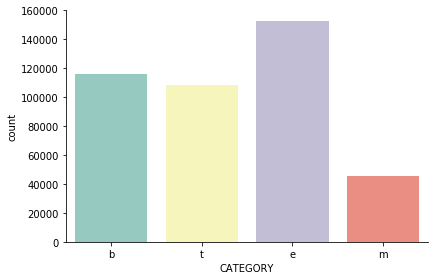

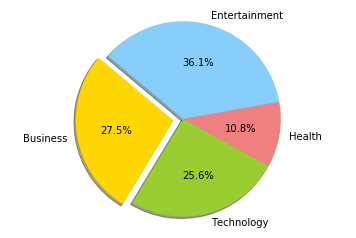

In [8]:
df = news[['TITLE', 'CATEGORY']]
sns.factorplot(x="CATEGORY", data=df, kind="count", size=4, aspect=1.5, palette="Set3")
plt.show();

# Data to plot
labels = 'Business','Technology','Health','Entertainment'
value = news.CATEGORY.value_counts()
e, b, t, m = value[0], value[1], value[2], value[3]
proportion = [b, t, m, e]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0, 0)  # explode 1st slice
 
# Plot
plt.pie(proportion, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

Lots of entertainment news and less news focussed on health. 

To help with the flow of this analysis, I will dive deeper into the data later on using K-means clustering. In the meantime, let's go ahead and start training some models to classify these news articles.

## 1.3 Training a model

#### Vectorizing the Data

To train the data using various algorithms it is necessary to vectorise the data and split it into train and test sets.

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

# pull the data into vectors
vectorizer = CountVectorizer()
x = vectorizer.fit_transform(news['TITLE'])

encoder = LabelEncoder()
y = encoder.fit_transform(news['CATEGORY'])

# split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

# take a look at the shape of each of these
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(316814, 54637)
(316814,)
(105605, 54637)
(105605,)


## 1.3a Linear SVC

According to the [scikit-learn algorithm cheat-sheet.](http://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)
The first machine learning algorithm to use is Support Vector Machines, specifically Linear Support Vector Classification ([Linear SVC](http://scikit-learn.org/stable/modules/svm.html#classification)). 
Followed by Naive Bayes.


Let's begin developing our first model using Linear SVC which implements the "one-vs-the-rest" multi-class classification method.

In [10]:
%%time
from sklearn import svm

lsvc = svm.LinearSVC()
lsvc.fit(x_train, y_train)

Wall time: 1min 13s


In [11]:
%%time
results_lsvc_cv = cross_val_score(lsvc, x_train, y_train, cv=5)
print(results_lsvc_cv.mean())

0.945564250121
Wall time: 4min


**94.6% accuracy using 5-fold cross validation**

In [12]:
x_test_lsvc_pred = lsvc.predict(x_test)
confusion_matrix(y_test, x_test_lsvc_pred)

array([[27103,   377,   252,  1467],
       [  442, 37057,   144,   318],
       [  387,   191, 10808,   146],
       [ 1344,   332,   114, 25123]], dtype=int64)

In [13]:
array = confusion_matrix(y_test, x_test_lsvc_pred)
# Normalise the confusion matrix
cm = array.astype('float') / array.sum(axis=1)[:, np.newaxis]

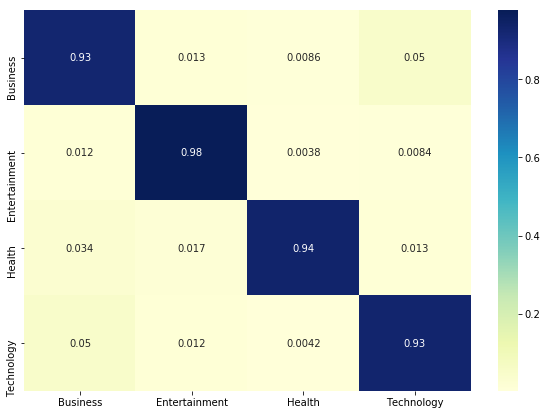

In [14]:
Cat = ["Business", "Entertainment", "Health", "Technology"]
df_cm = pd.DataFrame(cm, index = Cat, columns = Cat)
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, cmap="YlGnBu")

In [15]:
print(classification_report(y_test, x_test_lsvc_pred, target_names=encoder.classes_))

             precision    recall  f1-score   support

          b       0.93      0.93      0.93     29199
          e       0.98      0.98      0.98     37961
          m       0.95      0.94      0.95     11532
          t       0.93      0.93      0.93     26913

avg / total       0.95      0.95      0.95    105605



**Analysis of results** - This algorithm produces very good results in terms of accuracy at 94.6%. Training took 1 minute, while 5-fold cross validation took 4 minutes. Obtaining an accuracy of around 80% is typical in NLP problems.

## 1.3b Multinomial Naive Bayes

In [16]:
%%time 
nb = MultinomialNB()
nb.fit(x_train, y_train)

Wall time: 224 ms


In [17]:
%%time
results_nb_cv = cross_val_score(nb, x_train, y_train, cv=5)
print(results_nb_cv.mean())

0.92526845067
Wall time: 2.12 s


**92.5% accuracy using 5-fold cross validation**

In [18]:
x_test_pred = nb.predict(x_test)
confusion_matrix(y_test, x_test_pred)

array([[26285,   520,   459,  1935],
       [  502, 36510,   224,   725],
       [  432,   369, 10508,   223],
       [ 1725,   471,   260, 24457]], dtype=int64)

In [19]:
array = confusion_matrix(y_test, x_test_pred)
# Normalise the confusion matrix
cm = array.astype('float') / array.sum(axis=1)[:, np.newaxis]

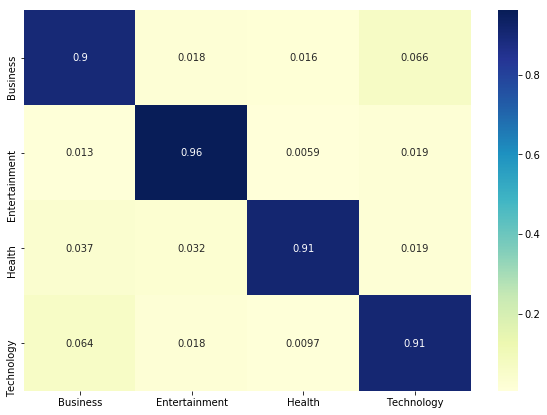

In [20]:
Cat = ["Business", "Entertainment", "Health", "Technology"]
df_cm = pd.DataFrame(cm, index = Cat, columns = Cat)
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, cmap="YlGnBu")

In [21]:
print(classification_report(y_test, x_test_pred, target_names=encoder.classes_))

             precision    recall  f1-score   support

          b       0.91      0.90      0.90     29199
          e       0.96      0.96      0.96     37961
          m       0.92      0.91      0.91     11532
          t       0.89      0.91      0.90     26913

avg / total       0.93      0.93      0.93    105605



**Analysis of results** - Accuracy 92.5% is not as high as Linear SVC but still very good. Training was instantaneous, while 5-fold cross validation took 2 seconds. An extremely fast but powerful model. If we refer back to the overall objective of producing sentiment trading signals, then classifying news categorise is only the first workstream in the process. Therefore the compromise in accuracy is probabaly acceptable in order to improve speed. 

## 1.3c Logistic regression

Just by running two algorithms we have managed to find acceptable solutions. Out of interest, we will carry out a couple more algorithms to compare. 

In [22]:
%%time
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

clf = OneVsRestClassifier(LogisticRegression())
clf.fit(x_train, y_train)

Wall time: 1min 4s


In [23]:
%%time
results_clf_cv = cross_val_score(clf, x_train, y_train, cv=5)
print(results_clf_cv.mean())

0.945791524442
Wall time: 4min 7s


**94.6% accuracy using 5-fold cross validation**

In [24]:
x_test_clf_pred = clf.predict(x_test)
confusion_matrix(y_test, x_test_clf_pred)

array([[27137,   404,   226,  1432],
       [  436, 37151,    92,   282],
       [  430,   241, 10701,   160],
       [ 1331,   374,    96, 25112]], dtype=int64)

In [25]:
array = confusion_matrix(y_test, x_test_clf_pred)
# Normalise the confusion matrix
cm = array.astype('float') / array.sum(axis=1)[:, np.newaxis]

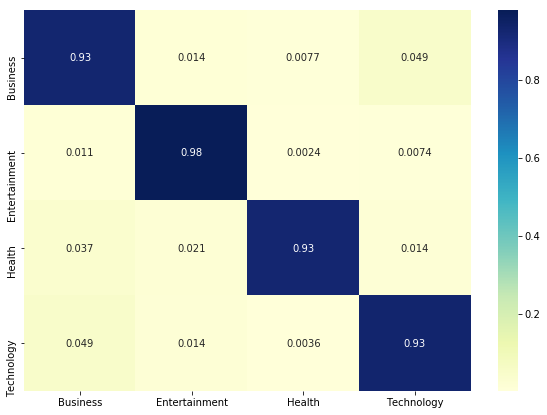

In [26]:
Cat = ["Business", "Entertainment", "Health", "Technology"]
df_cm = pd.DataFrame(cm, index = Cat,
                  columns = Cat)
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, cmap="YlGnBu")

In [27]:
print(classification_report(y_test, x_test_clf_pred, target_names=encoder.classes_))

             precision    recall  f1-score   support

          b       0.93      0.93      0.93     29199
          e       0.97      0.98      0.98     37961
          m       0.96      0.93      0.95     11532
          t       0.93      0.93      0.93     26913

avg / total       0.95      0.95      0.95    105605



**Analysis of results** - As expected, very similar results to Linear SVC. 

## 1.3d Random Forest

In [28]:
%%time
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train, y_train)

Wall time: 11min 51s


In [29]:
%%time
results_rf_cv = cross_val_score(rf, x_train, y_train, cv=5)
print(results_rf_cv.mean())

0.906446653552
Wall time: 47min 19s


**90.6% accuracy using 5-fold cross validation**

In [30]:
x_test_rf_pred = rf.predict(x_test)
confusion_matrix(y_test, x_test_rf_pred)

array([[26501,  1155,   279,  1264],
       [  814, 36606,   161,   380],
       [  730,   837,  9720,   245],
       [ 1877,  1225,   203, 23608]], dtype=int64)

In [31]:
array = confusion_matrix(y_test, x_test_rf_pred)
# Normalise the confusion matrix
cm = array.astype('float') / array.sum(axis=1)[:, np.newaxis]

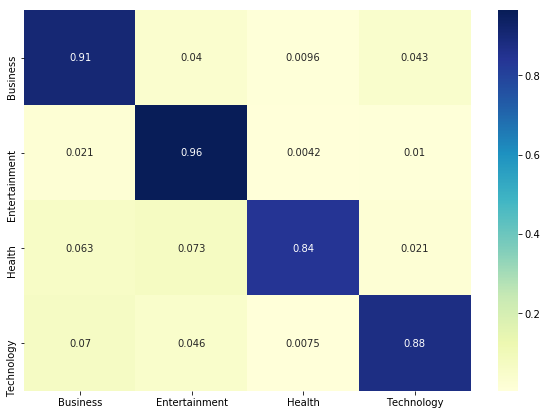

In [32]:
Cat = ["Business", "Entertainment", "Health", "Technology"]
df_cm = pd.DataFrame(cm, index = Cat,
                  columns = Cat)
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, cmap="YlGnBu")

In [33]:
print(classification_report(y_test, x_test_rf_pred, target_names=encoder.classes_))

             precision    recall  f1-score   support

          b       0.89      0.91      0.90     29199
          e       0.92      0.96      0.94     37961
          m       0.94      0.84      0.89     11532
          t       0.93      0.88      0.90     26913

avg / total       0.91      0.91      0.91    105605



**Analysis of results** - Following the scikit-learn algorithm cheat-sheet makes sense. Random Forest is the wrong tool to use and has taken a huge amount of time to run in comparison to previous methods. In addition the accuracy results are the lowest of all the methods at 90.7%

## 1.4 Testing some predictions using Multinomial NB model

In [34]:
def predict(title):
    cat_names = {'b' : 'Business', 't' : 'Science and Technology', 'e' : 'Entertainment', 'm' : 'Health'}
    cod = nb.predict(vectorizer.transform([title]))
    return cat_names[encoder.inverse_transform(cod)[0]]

In [35]:
predict("Bank of England raises interest rates")

'Business'

In [36]:
predict("Cryptocurrencies rally on news of latest technology advances")

'Business'

In [37]:
predict("The health of the Asian market is entertaining to watch")

'Business'

In [38]:
predict("The UK economy is in better shape than expected, Chancellor Philip Hammond is set to say in his Spring Statement. But he will resist calls from Labour and some Tories to use the extra cash from tax receipts to ease the spending squeeze they say is pushing the public sector to breaking point. Mr Hammond will argue that the UK's national debt is still far too high.")

'Business'

In [39]:
predict("Chinese takeaway meals from restaurants and supermarkets should carry health warnings because they are often high in salt, a campaign group says.")

'Health'

In [40]:
predict("Demand for the new millennial railcard has crashed the website on the first day of nationwide sales.")

'Science and Technology'

In [41]:
predict("Beyonce and Jay-Z are going on a joint tour called On The Run II, it has finally been confirmed. The announcement was made in a promotional video of the couple together which was posted on Beyonce's Instagram page. Fans had speculated the couple were planning a joint tour after a listing was posted on Ticketmaster and on Beyonce's Facebook page last Tuesday.")

'Entertainment'

## 1.5 Saving and importing the model for future use

In [43]:
import pickle

# save the model to disk
filename = 'finalized_nb.sav'
pickle.dump(nb, open(filename, 'wb'))

In [44]:
# some time later...
# load the model from disk
filename = 'finalized_nb.sav'
nb = pickle.load(open(filename, 'rb'))

## 1.6 Lessons I have learnt from this project

New tools to add to skillset:
-  EDA visualisation techniques: trying out different ways to plot bar and pie charts using seaborn and matplotlib.
-  EDA visualisation techniques: experimenting with diffent ways to plot confusion matrices. Choose to use seaborn heatmap.
-  Using CountVectorizer

Practiced:
-  Linear SVC
-  Logistic Regression (OneVsRestClassifier)
-  Multinomial Naive Bayes
-  Random Forest
-  Cross validation
-  Saving models and importing models for future use